Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Importing Dataset

In [7]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [8]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
x = dataset.drop('Purchased', axis = 1)
y = dataset['Purchased']

Splitting dataset into Train/Test set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Feature Scaling dataset

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training dataset with K Nearest Neighbors model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predictions

In [13]:
y_pred = classifier.predict(x_test)

In [14]:
results = pd.DataFrame({'Test set': np.array(y_test), 'Predictions': np.array(y_pred)})

In [15]:
results

,Test set,Predictions
0,0,1
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
75,0,0
76,0,1
77,0,0
78,0,0


Metrics

In [16]:
print(confusion_matrix(y_test, y_pred))

[[47  7]
 [ 4 22]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90        54
           1       0.76      0.85      0.80        26

    accuracy                           0.86        80
   macro avg       0.84      0.86      0.85        80
weighted avg       0.87      0.86      0.86        80



Finding optimal number of K by using Elbow Method

In [18]:
error_rate = []
for i in range(1, 40):
  classifier_i = KNeighborsClassifier(n_neighbors= i, metric= 'minkowski', p = 2)
  classifier_i.fit(x_train, y_train)
  y_pred_i = classifier_i.predict(x_test)
  error_rate.append(np.mean(y_pred_i != y_test))

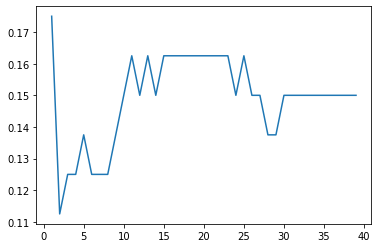

In [19]:
plt.plot(range(1, 40), error_rate)

K = 8 (from Elbow Method)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
print(confusion_matrix(y_test, y_pred))

[[48  6]
 [ 4 22]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        54
           1       0.79      0.85      0.81        26

    accuracy                           0.88        80
   macro avg       0.85      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80

